<a href="https://colab.research.google.com/github/manideepvangari/Week3-Rule-Based-Systems/blob/main/generative_grammars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/IAT-ComputationalCreativity-Spring2025/Week3-Rule-Based-Systems/blob/main/generative_grammars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**A2 On Bottom of Notebook**

# Generative Grammars Lab Exercise

This notebook introduces context-free grammars and their implementation in Python
for generating natural language sentences.

## Introduction to Generative Grammars

A context-free grammar consists of:
- **Terminal symbols**: Words that appear in the final output (e.g., "cat", "dog")
- **Non-terminal symbols**: Placeholders that get replaced by other symbols (e.g., NP, VP)
- **Production rules**: Rules that define how non-terminals can be replaced

For example:
- S → NP VP (A sentence consists of a noun phrase followed by a verb phrase)
- NP → Det N (A noun phrase consists of a determiner followed by a noun)
- VP → V (A verb phrase can be just a verb)

In [ ]:
import random

# Define our basic grammar
basic_grammar = {
    'S': [['NP', 'VP']],
    'NP': [['Det', 'N'], ['Det', 'Adj', 'N']],
    'VP': [['V', 'NP'], ['V']],
    'Det': ['the', 'a', 'my'],
    'N': ['cat', 'dog', 'robot', 'programmer'],
    'V': ['sleeps', 'jumps', 'codes', 'runs'],
    'Adj': ['quick', 'lazy', 'clever', 'brave']
}

def generate(symbol, grammar):
    """
    Recursively generate a string from the grammar starting with the given symbol.

    Args:
        symbol: The symbol to start generating from

    Returns:
        A string generated from the grammar rules
    """
    if isinstance(symbol, str) and symbol in grammar:
        production = random.choice(grammar[symbol])
        if isinstance(production, list):
            return ' '.join(generate(sym, grammar) for sym in production)
        return production
    return symbol

## Basic Sentence Generation

Let's generate some basic sentences using our grammar:

In [ ]:
print("Generated sentences:\n")
for i in range(5):
    print(f"{i+1}. {generate('S', basic_grammar)}")

Generated sentences:

1. a cat runs a lazy cat
2. my cat runs the programmer
3. the lazy robot runs
4. a cat jumps the robot
5. my quick robot codes the quick robot


## Exercise 1: Expanding the Grammar

Now it's your turn! Modify the grammar to include:
- More nouns
- More adjectives
- More verbs

Try adding these categories:


In [ ]:
# Create an expanded grammar
expanded_grammar = basic_grammar.copy()  # Start with our original grammar

# Add more words to existing categories
# i.e. expanded_grammar['N'].extend(['apple', 'orange'])
expanded_grammar['N'].extend(['car', 'computer'])
expanded_grammar['V'].extend(['dances','laughs'])
expanded_grammar['Adj'].extend(['shiny','dull'])
expanded_grammar['Det'].extend(['this'])

In [ ]:
# Try the expanded grammar
print("Generated sentences with expanded vocabulary:\n")
for i in range(5):
    print(f"{i+1}. {generate('S', expanded_grammar)}")

Generated sentences with expanded vocabulary:

1. a brave car sleeps
2. a robot runs a cat
3. my cat codes this lazy cat
4. a computer dances
5. a cat sleeps a robot


## Exercise 2: Adding Questions

Let's modify the grammar to generate questions. We'll need:
- Question words (who, what, where, etc.)
- New production rules for question structure
- Appropriate verb forms

In [ ]:
question_grammar = expanded_grammar.copy()

# Question-related rules
question_grammar['S'].append(['Q'])  # Add question as possible sentence type
# Create some question structures and words here
question_grammar['Q'] = [['do', 'you', 'like', 'QW'], ['who', 'was', 'the', 'QW'], ['is', 'there', 'a', 'QW'], ['where', 'is', 'the', 'QW']]  # Question structures
question_grammar['QW'] = ['chicken' , 'driver', 'limit', 'plate']  # Question words


In [ ]:
print("Generated questions:\n")
for i in range(5):
    print(f"{i+1}. {generate('Q', question_grammar)}?")

Generated questions:

1. do you like driver?
2. where is the chicken?
3. is there a driver?
4. is there a limit?
5. is there a driver?


## Challenge: Poetry Generation

Create a grammar that generates simple poetry. Consider:
- Line structures
- Rhyming words
- Poetic phrases

In [ ]:
import random

# Grammar explicitly designed for haikus
haiku_grammar = {
    'POEM': [['LINE_5', 'LINE_7', 'LINE_5']],
    'LINE_5': [['N','V','ADV']],
    'LINE_7': [['DET','ADJ','N','V']],

    'DET': ['the', 'a', 'my'],
    'ADJ': ['beautiful', 'elegant', 'majestic', 'melodic', 'harmonic'],
    'N': ['moon', 'dream', 'dog', 'girl', 'bird'],
    'V': ['whispers', 'dances', 'lingers', 'batters', 'treasures'],
    'ADV': ['softly', 'sweetly', 'gently', 'weakly', 'strongly'],
}

def generate(symbol):
    """
    Recursively generate a line or phrase from the grammar.
    """
    if isinstance(symbol, list):
        return ' '.join(generate(part) for part in symbol)
    elif symbol in haiku_grammar:
        production = random.choice(haiku_grammar[symbol])
        return generate(production)
    return symbol

def generate_haiku():
    """
    Generate a haiku in 5-7-5 syllable structure using the grammar.
    """
    poem_structure = haiku_grammar['POEM'][0]
    return '\n'.join(generate(line) for line in poem_structure)

# Generate and print a haiku
print("Generated haiku:\n")
print(generate_haiku())


Generated haiku:

dream dances gently
my melodic dream batters
dog dances gently


## Exercises for Practice

1. Try adding different types of sentence structures to the basic grammar
2. Create themed vocabularies (e.g., science fiction, fantasy, nature)
3. Modify the poetry generator to create different verse structures
4. Add rhyming capabilities to the poetry generator
5. Implement a grammar for generating specific types of text (e.g., news headlines, weather reports)

Remember: The beauty of generative grammars lies in their ability to create infinite variations from a finite set of rules!

////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

#A2: Rule-Based System



**The first ruleset** will take the theme of a romance story. The story elements/rules will include the intro, first sighting, a reaction, interaction, and ending.

In [104]:
import random

#Grammar rules for a romance story
romance_grammar = {
    #Create the timeline of the story
    'STORY': [['INTRO', 'FIRST_SIGHT', 'REACTION', 'INTERACTION', 'ENDING']],

    #Create introduction using the setting of the university, adjective of day, as well as protagonist.
    'INTRO': [[' It was another', 'ADJ_DAY', 'morning in the university, where students shuffled into their classrooms, chatting about their assignments and upcoming exams.\n',
               'PROTAGONIST', 'sat in the', 'SETTING', 'waiting for class to begin, his fingers tapping lightly on the desk as he stared out the window, lost in thought.\n']],

    #Create the first-sighting plot point using the name of the girl aka love interest, and an adjective of her prescence.
    'FIRST_SIGHT': [['Then,', 'LOVE_INTEREST', 'walked in, with her long black hair flowing like silk behind her, her presence', 'ADJ_PRESENCE',
                     'drawing his eyes towards her as she moved to her seat.\n']],

    #Create a reaction using the protagonist and a reaction verb
    'REACTION': [['PROTAGONIST', 'felt his heart', 'V_REACT', 'as he struggled to look away, a warm rush spreading through his chest',
                   'while his mind raced with thoughts of how he could speak to her. \n She was so freaking beautiful.\n']],

    #Create an interaction between the protagonist and love interest using the verb for interaction.
    'INTERACTION': [['For a brief moment, their eyes met, and she', 'V_INTERACT', 'before looking away. He noticed a soft smile at the corners of her lips,'
                      ' as if she too had felt a spark between them.\n']],

    #Create a default ending to finish the story
    'ENDING': [['Was it fate, or just a fleeting moment in time that would soon be forgotten? Only time would tell if this was the beginning of something real. \n Or was it just',
                'another passing day in the university?']],

    # Word banks to use in the story
    'PROTAGONIST': ['Ethan', 'Daniel', 'James', 'Jordan'],
    'LOVE_INTEREST': ['Sophia', 'Isabelle', 'Emily', 'Luna'],

    'ADJ_DAY': ['ordinary', 'quiet', 'rainy', 'sunny'],
    'SETTING': ['lecture hall', 'philosophy class', 'library', 'cafeteria'],

    'ADJ_PRESENCE': ['effortlessly', 'gracefully', 'mesmerizingly', 'softly'],
    'V_REACT': ['skip a beat', 'race', 'stop', 'pound'],
    'V_INTERACT': ['smiled', 'tilted her head', 'brushed a lock of hair behind her ear', 'glanced away'],
}

def generate(symbol, protagonist_name=None):
     #Recursively generate a part of the story from the grammar.
    if isinstance(symbol, list):
        return ' '.join(generate(part, protagonist_name) for part in symbol)
    elif symbol in romance_grammar:
        if symbol == 'PROTAGONIST' and protagonist_name is not None:
            return protagonist_name
        return generate(random.choice(romance_grammar[symbol]), protagonist_name)
    return symbol

def generate_romance_story():
    # Pick the protagonist's name at the beginning of the story
    # Always use the same name within the story
    protagonist_name = random.choice(romance_grammar['PROTAGONIST'])
    return generate(romance_grammar['STORY'][0], protagonist_name)

print("////////Generated Romance Story////////\n")
print(generate_romance_story())


////////Generated Romance Story////////

 It was another quiet morning in the university, where students shuffled into their classrooms, chatting about their assignments and upcoming exams.
 James sat in the philosophy class waiting for class to begin, his fingers tapping lightly on the desk as he stared out the window, lost in thought.
 Then, Isabelle walked in, with her long black hair flowing like silk behind her, her presence gracefully drawing his eyes towards her as she moved to her seat.
 James felt his heart skip a beat as he struggled to look away, a warm rush spreading through his chest while his mind raced with thoughts of how he could speak to her. 
 She was so freaking beautiful.
 For a brief moment, their eyes met, and she glanced away before looking away. He noticed a soft smile at the corners of her lips, as if she too had felt a spark between them.
 Was it fate, or just a fleeting moment in time that would soon be forgotten? Only time would tell if this was the beginni

**The second ruleset** will take the theme of a hero's journey with the ol' classic "once apon a time..." introduction. The story elements/rules will include the intro, a conflict, a climax, and a resolution

In [ ]:
import random

#Grammar rules for a hero's journey
story_grammar = {
    #Create the timeline of the story
    'STORY': [['INTRO', 'CONFLICT', 'CLIMAX', 'RESOLUTION']],

    #Create introductions using the setting, charactar, and goal.
    'INTRO': [[' Once upon a time, in a', 'SETTING', 'there lived a', 'CHARACTER', 'who was on a great quest to', 'GOAL',
               'Their journey began on a fateful day when an old seer\n spoke of a prophecy, one that would change everything for our hero.']],

    #Create a conflict for the hero/character to encounter aka a plot_point.
    'CONFLICT': [['One day, the', 'CHARACTER', 'encountered a', 'PLOT_POINT', 'that shook him to the core.\n',
                  'This new challenge forced them to introspect and rethink their purpose in life.\n']],

    #Create a climax where the character makes an important plot decision
    'CLIMAX': [['In the heat of the moment, the', 'CHARACTER', 'had to make a difficult and life-changing decision: to', 'PLOT_DECISION',
                'or to fail.\n']],

    #Create a resolution using the character, a setting place, and introspection.
    'RESOLUTION': [['After the chaos, the', 'CHARACTER', 'found solace in a', 'SETTING', 'where he lay quietly in the sunshine, thinking.\n',
                   'INTROSPECTION']],

    # Word banks to use in the story
    'CHARACTER': ['brave knight', 'mighty warrior', 'fearless explorer', 'wise wizard', 'mysterious stranger'],
    'SETTING': ['distant kingdom', 'enchanted forest', 'deserted island', 'forgotten castle'],
    'GOAL': ['defeat a dragon.', 'find the lost treasure.', 'rescue the kidnapped princess.', 'uncover a hidden secret.'],
    'PLOT_POINT': ['mysterious oil lamp', 'treacherous betrayal', 'great battle', 'dangerous journey', 'secret discovery'],
    'PLOT_DECISION': ['sacrifice their life', 'betray an ally', 'seek revenge'],
    'INTROSPECTION': ['What was all this for?', 'Was it worth it?', 'Did I do the right thing?', 'What do I do now?'],
}

def generate(symbol, protagonist_name=None):
    #Recursively generate a part of the story from the grammar.
    if isinstance(symbol, list):
        return ' '.join(generate(part, protagonist_name) for part in symbol)
    elif symbol in story_grammar:
        if symbol == 'CHARACTER' and protagonist_name is not None:
            return protagonist_name
        return generate(random.choice(story_grammar[symbol]), protagonist_name)
    return symbol

def generate_story():
    #Generate a complete story using the grammar.

    # Pick the protagonist's name at the beginning of the story
    protagonist_name = random.choice(story_grammar['CHARACTER'])

    # Use only that name within the story
    story = generate(story_grammar['STORY'][0], protagonist_name)
    return story

print("////////Generated Story////////\n")
print(generate_story())


////////Generated Story////////

 Once upon a time, in a forgotten castle there lived a wise wizard who was on a great quest to defeat a dragon. Their journey began on a fateful day when an old seer
 spoke of a prophecy, one that would change everything for our hero. One day, the wise wizard encountered a secret discovery that shook him to the core.
 This new challenge forced them to introspect and rethink their purpose in life.
 In the heat of the moment, the wise wizard had to make a difficult and life-changing decision: to sacrifice their life or to fail.
 After the chaos, the wise wizard found solace in a distant kingdom where he lay quietly in the sunshine, thinking.
 Was it worth it?


#Sample Outputs


Here are some sample outputs for the first rule-based system of the romance story:

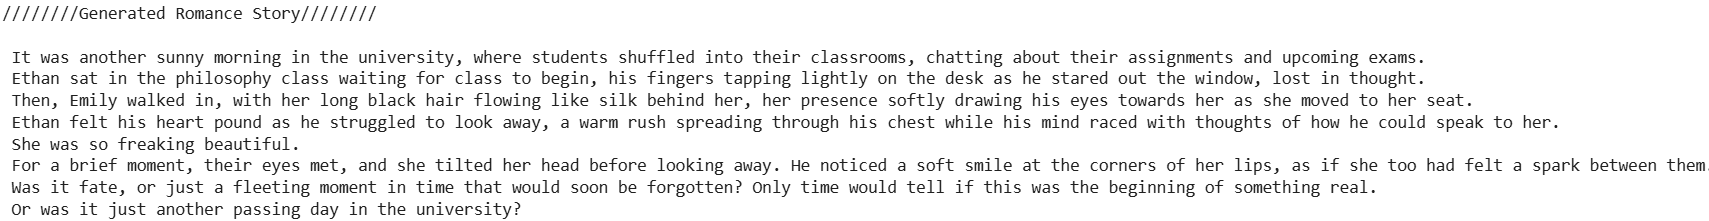

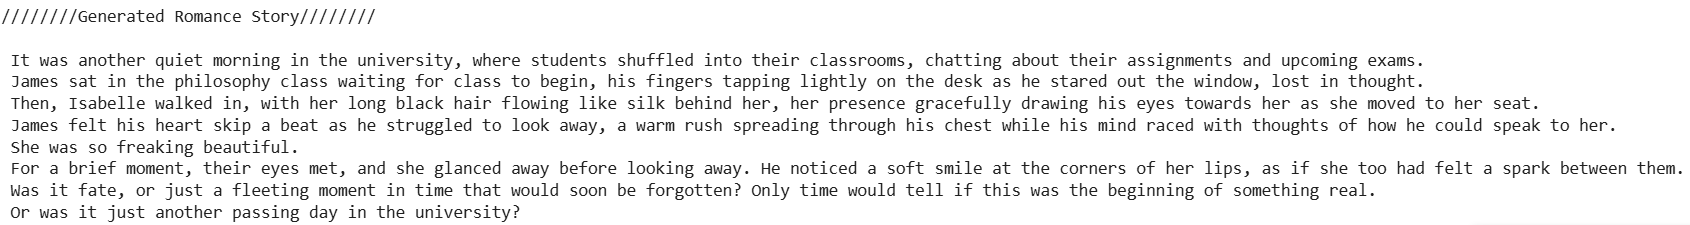

Each of these stories are generated using the same principle, so I will be explaining them together instead of individually separating them.

These stories are generated by using predefined rules that determine the structure of the narrative. Each story follows a fixed sequence of ['INTRO', 'FIRST_SIGHT', 'REACTION', 'INTERACTION', 'ENDING'], with all of these components generated using a template that I created. Each part of the story such as names, adjectives, verbs, etc, are randomly generated and chosen from pre-defined lists. The final output is a complete short romance story with varied details each time it's generated.

For example in the first story, a different adjective was chosen such as "sunny morning" in the first story which differs to "quiet morning" in the second story. Similarily, the protagonist name "Ethan" was randomly chosen, which differs to "James" in the second story.